In [134]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
import argparse

### CAUTION
Run this code on jupyter notebook (terminal에서 하면 savefig할 때 에러 남. 이유는 모름.)

## README
- input: binned correlation matrices made from Hi-C and 450K
- output: 
    - Heatmap of each binned correlation matrix. -> savefig.
    - A/B compartment estimated from each binned correlation matrix -> savefig.

In [135]:
hic_data_dir = '/data/project/jeewon/research/3D-ITH/data/GSE18199_HiC-EBV-2009/'

In [5]:
os.chdir('/data/project/jeewon/research/3D-ITH/code3')
data_dir = '/data/project/jeewon/research/3D-ITH/data/GSE36369_450K_EBV/'

In [ ]:
# for python script(.py) only
parser = argparse.ArgumentParser()
parser.add_argument('--chromosome', required=True, default = '14', help = 'chromosome-of-interest', type = str)
parser.add_argument('--region', required=True, default = 'opensea', help = 'region-of-interest', type = str)
args = parser.parse_args()
print("Chromosome-of-interest: ", args.chromosome)
print("Region-of-interest: ", args.region)
chromosome = args.chromosome
region = args.region

### Import binned corr. matrices
- 450K-EBV
- HiC-EBV-2009

In [11]:
binned_corr_df_pickle = '450k_EBV_binned_corr_df_chr'+chromosome + '_'+region+'.pickle'
binned_corr_450k = pd.read_pickle(binned_corr_df_pickle)

In [12]:
binned_corr_hic_fname = 'binned_heatmap/HIC_gm06690_chr'+chromosome+'_chr'+chromosome+'_100000_pearson.txt'
binned_corr_hic = pd.read_csv(os.path.join(hic_data_dir, binned_corr_hic_fname), skiprows=[0], index_col = 0, sep = '\t')
binned_corr_hic = binned_corr_hic.iloc[:,:-1]

In [13]:
#display(binned_corr_hic.head())
print("binned_corr_hic_matrix shape: ", end = ' ')
print(binned_corr_hic.shape)

binned_corr_hic_matrix shape:  (1064, 1064)


In [15]:
bin_with_probes_list_pickle = 'bin_with_probes_list_chr'+chromosome+'_'+region+'.pickle'

with open(bin_with_probes_list_pickle, 'rb') as f2:
    bin_with_probes_list = pickle.load(f2)

In [17]:
bin_with_probes_index_pickle = 'bin_with_probes_index_list_chr'+chromosome+'_'+region+'.pickle'

with open(bin_with_probes_index_pickle, 'rb') as f3:
    bin_with_probes_index = pickle.load(f3)

In [18]:
print("Extract bins-with-opensea-CpG-probes from binned correlation matrix of HiC.")
binned_corr_hic2 = binned_corr_hic.iloc[bin_with_probes_index, bin_with_probes_index]
print("binned_corr_HiC shpae: ", binned_corr_hic2.shape)
print("\n")

Extract bins-with-opensea-CpG-probes from binned correlation matrix of HiC.
binned_corr_HiC shpae:  (746, 746)




In [19]:
print("bin_with_probes_indices(first 10): ",bin_with_probes_index[:10])
print("\n")
print("binned_corr_hic2_indices (first 10): ", binned_corr_hic2.index.values[:10])
print("\n")
print("binned_corr_450k_indices (first 10): ", binned_corr_450k.index.values[:10])
print("\n")
print("binned_corr_450k_shape: ", binned_corr_450k.shape)
print("\n")
print("binned_corr_hic2_shape: ", binned_corr_hic2.shape)
print("\nMake sure that the last two shapes coincide!!\n")

bin_with_probes_indices(first 10):  [181, 184, 186, 188, 190, 192, 193, 194, 195, 196]


binned_corr_hic2_indices (first 10):  ['HIC_bin182|hg18|chr14:18100000-18199999'
 'HIC_bin185|hg18|chr14:18400000-18499999'
 'HIC_bin187|hg18|chr14:18600000-18699999'
 'HIC_bin189|hg18|chr14:18800000-18899999'
 'HIC_bin191|hg18|chr14:19000000-19099999'
 'HIC_bin193|hg18|chr14:19200000-19299999'
 'HIC_bin194|hg18|chr14:19300000-19399999'
 'HIC_bin195|hg18|chr14:19400000-19499999'
 'HIC_bin196|hg18|chr14:19500000-19599999'
 'HIC_bin197|hg18|chr14:19600000-19699999']


binned_corr_450k_indices (first 10):  ['chr14:18100000-18199999' 'chr14:18400000-18499999'
 'chr14:18600000-18699999' 'chr14:18800000-18899999'
 'chr14:19000000-19099999' 'chr14:19200000-19299999'
 'chr14:19300000-19399999' 'chr14:19400000-19499999'
 'chr14:19500000-19599999' 'chr14:19600000-19699999']


binned_corr_450k_shape:  (746, 746)


binned_corr_hic2_shape:  (746, 746)

Make sure that the last two shapes coincide!!



### Histogram of binned corr. matrices of 450K and HiC

hist_fname:  Histogram_binned_corr_matrix_chr14_opensea.png


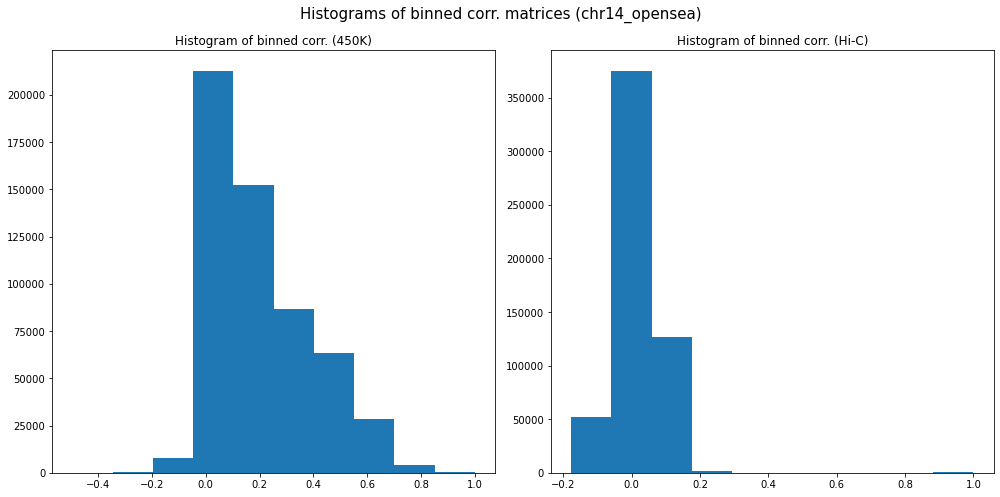

In [22]:
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(121)
ax1.hist(binned_corr_450k.values.flatten())
ax1.set_title('Histogram of binned corr. (450K)')
ax2 = fig.add_subplot(122)
ax2.hist(binned_corr_hic2.values.flatten())
ax2.set_title('Histogram of binned corr. (Hi-C)')
suptitle_ = 'Histograms of binned corr. matrices (chr'+chromosome+'_'+region+')'
plt.suptitle(suptitle_, fontsize = 15)
plt.tight_layout()
#plt.show()
hist_fname = 'Histogram_binned_corr_matrix_chr'+chromosome+'_'+region+'.png'
plt.savefig(hist_fname)
print("hist_fname: ", hist_fname)
print("\n")

## Plot heatmaps of binned corr. matrices of 450K and HiC
- check whether these two plots are consistent to each other.

heatmap_fname:  Heatmap_binned_corr_matrix_chr14_opensea.png


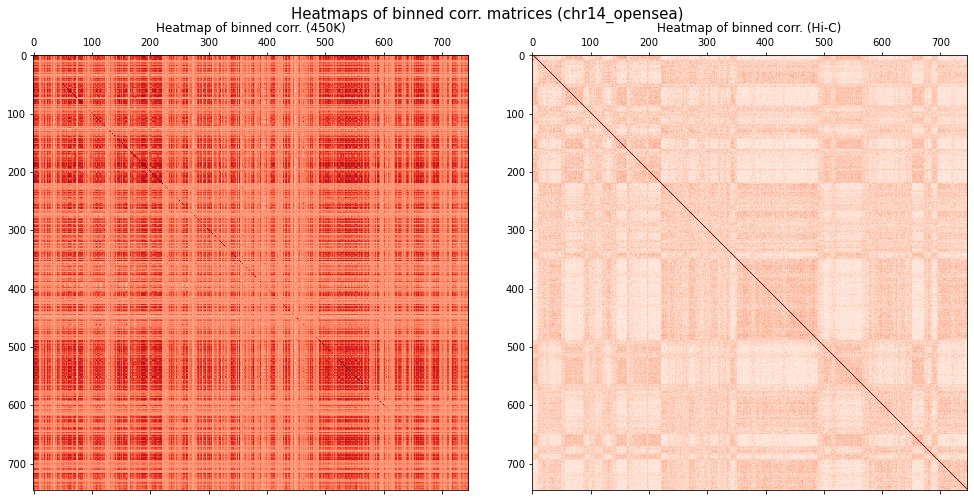

In [24]:
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(121)
ax1.matshow(binned_corr_450k.values, cmap = 'Reds', vmin = np.min(binned_corr_450k.values.flatten()), vmax = np.max(binned_corr_450k.values.flatten()))
ax1.set_title('Heatmap of binned corr. (450K)')
ax2 = fig.add_subplot(122)
ax2.matshow(binned_corr_hic2.values, cmap = 'Reds', vmin = np.min(binned_corr_hic2.values.flatten()), vmax = np.max(binned_corr_hic2.values.flatten()))
ax2.set_title('Heatmap of binned corr. (Hi-C)')
suptitle_ = 'Heatmaps of binned corr. matrices (chr'+chromosome+'_'+region+')'
plt.suptitle(suptitle_, fontsize = 15)
plt.tight_layout()
#plt.show()
heatmap_fname = 'Heatmap_binned_corr_matrix_chr'+chromosome+'_'+region+'.png'
plt.savefig(heatmap_fname)
print("heatmap_fname: ", heatmap_fname)
print("\n")

### PCA
- binned_corr_hic2 // binned_corr_450k
- Extract PC1
- get sign of each entry of PC1
- assign each sign (-/+) to A/B compartment
- calculate aggrement ratio of A/B compartment calculated from HiC and 450K data.
- Exclude bins which satisfies abs(entry of PC1 of this bin) <= 0.01 --> thresholding

In [25]:
pca = PCA(n_components = 3)
pca_hic = pca.fit_transform(binned_corr_hic2.values)

In [26]:
pca2 = PCA(n_components = 3)
pca_450k = pca2.fit_transform(binned_corr_450k.values)

In [27]:
print("pca_hic shape: ", pca_hic.shape)
print("pca_450k shape: ", pca_450k.shape)

pca_hic shape:  (746, 3)
pca_450k shape:  (746, 3)


In [28]:
pca_450k_pc1 = pca_450k[:,0]
pca_hic_pc1 = pca_hic[:,0]

===========================================================================================

### Assign A/B compartments to each bin in binned corr. matrices
- The sign of the eigenvector is chosen so that the sign of the correlation between the eigenvector and column sums of the correlation matrix is positive; this ensures that positive values of the eigenvector are associated with the closed compartment
- binned_corr_450k
- binned_corr_hic2
- pca_hic_pc1
- pca_450k_pc1

In [ ]:
print("Assign A/B compartments to each bin in binned corr. matrices")

In [62]:
corr_colsum = binned_corr_450k.sum().values

In [63]:
sgn = np.sign(stats.pearsonr(pca_450k_pc1, corr_colsum)[0])
print("sgn of correlation between eigenvector and column sums of binned corr. matrix: ", sgn)

sgn of correlation between eigenvector and column sums of binned corr. matrix:  -1.0


In [80]:
if sgn == -1:
    print("Multiply (-1) to 450k PC1 vector.")
    pca_450k_pc1_v2 = (-1) * pca_450k_pc1
elif sgn == 1:
    pca_450k_pc1_v2 = pca_450k_pc1
else: #sign == 0
    print("Correlation bettwen eigenvector and column sums of binned corr. matrix is 0. Error might have occurred.")

Multiply (-1) to 450k PC1 vector.


============================================================================================================

#### thresholding 전에 일단 한번 확인
- use pca_450k_pc1_v2

In [67]:
print("Pearson corr. between PC1 of Hi-C and PC1 of 450K (corr, p-value):", end = ' ')
print(stats.pearsonr(pca_hic_pc1, pca_450k_pc1_v2))
print("\n")

Pearson corr. between PC1 of Hi-C and PC1 of 450K (corr, p-value): (0.6576239542273636, 1.353072060602522e-93)


scatter_fname:  Scatter_plot_PC1_chr_14_opensea.png


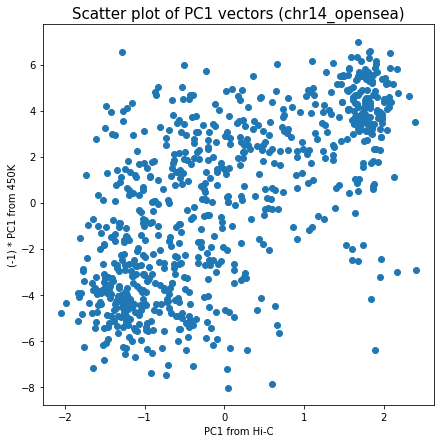

In [73]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.scatter(pca_hic_pc1, pca_450k_pc1_v2)
ax.set_xlabel("PC1 from Hi-C")
if sgn == -1:
    ylabel = '(-1) * PC1 from 450K'
elif sgn == 1:
    ylabel = 'PC1 from 450K'
ax.set_ylabel(ylabel)
scatter_title_ = 'Scatter plot of PC1 vectors (chr'+chromosome+'_'+region+')'
ax.set_title(scatter_title_, fontsize = 15)
#plt.show()
scatter_fname = 'Scatter_plot_PC1_chr_'+chromosome+'_'+region+'.png'
plt.savefig(scatter_fname)
print("scatter_fname: ", scatter_fname)
print("\n")

plot_fname:  Plot_PC1_chr_14_opensea.png


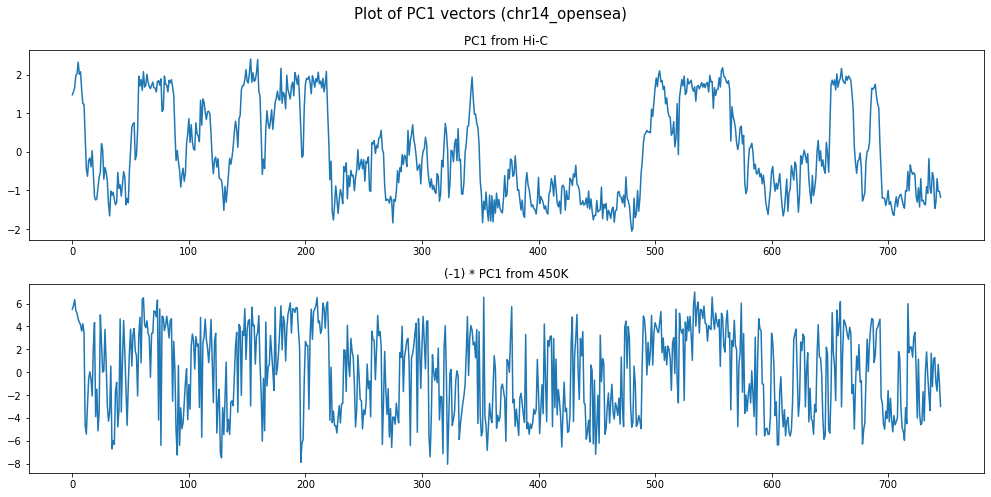

In [74]:
fig = plt.figure(figsize = (14, 7))

ax1 = fig.add_subplot(211)
ax1.plot(pca_hic_pc1)
ax1.set_title("PC1 from Hi-C")

ax2 = fig.add_subplot(212)
ax2.plot(pca_450k_pc1_v2)

if sgn == -1:
    title = '(-1) * PC1 from 450K'
elif sgn == 1:
    title = 'PC1 from 450K'
ax2.set_title(title)

suptitle_ = 'Plot of PC1 vectors (chr'+chromosome+'_'+region+')'
plt.suptitle(suptitle_ , fontsize = 15)
plt.tight_layout()
#plt.show()
plot_fname = 'Plot_PC1_chr_'+chromosome+'_'+region+'.png'
plt.savefig(plot_fname)
print("plot_fname: ", plot_fname)
print("\n")

### Thresholding
- 450K와 HiC로부터 얻은 PC1 모두에서 절댓값이 0.01 이상인 bin들만 남기기. 

In [75]:
print("Thresholding: extract bins satisfying abs(corresponding entry of PC1) >= 0.01\n")
print("Number of bins before thresholding: ", len(pca_hic_pc1))
print("\n")
print("\nNumber of bins after threhsolding: ", np.array([abs(pca_hic_pc1[i]) >= 0.01 and abs(pca_450k_pc1_v2[i]) >= 0.01 for i in range(len(pca_hic_pc1))]).sum())
print("\n")
print("Total number of bins_with_probes: ", len(pca_hic_pc1))
print("\n")
print("Ratio of bins after thresholding to total number of bins: ",  
      np.array([abs(pca_hic_pc1[i]) >= 0.01 and abs(pca_450k_pc1_v2[i]) >= 0.01 for i in range(len(pca_hic_pc1))]).sum() /  len(pca_hic_pc1))
print("\n")

Thresholding: extract bins satisfying abs(corresponding entry of PC1) >= 0.01

Number of bins before thresholding:  746

Number of bins after threhsolding:  744
Total number of bins_with_probes:  746
Ratio of bins after thresholding to total number of gins:  0.9973190348525469


In [76]:
threshold_mask = np.array([abs(pca_hic_pc1[i]) >= 0.01 and abs(pca_450k_pc1_v2[i]) >= 0.01 for i in range(len(pca_hic_pc1))])
pca_450k_v2_thresholded = pca_450k_pc1_v2[threshold_mask]
pca_hic_thresholded = pca_hic_pc1[threshold_mask]

In [77]:
print("Pearson correlation using thresholded data (corr, p-value): ", (stats.pearsonr(pca_hic_thresholded, pca_450k_v2_thresholded)))
print("\n")

Pearson correlation using thresholded data (corr, p-value):  (0.6576934672259573, 2.2485795711913183e-93)


threshold_scatter_fname:  Thresholded_scatter_plot_PC1_chr_14_opensea.png


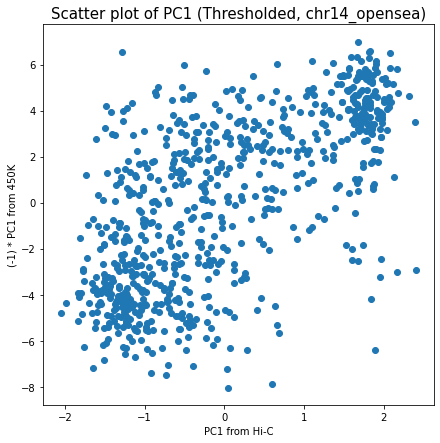

In [78]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.scatter(pca_hic_thresholded, pca_450k_v2_thresholded)
ax.set_xlabel("PC1 from Hi-C")

if sgn == -1:
    ylabel = '(-1) * PC1 from 450K'
elif sgn == 1:
    ylabel = 'PC1 from 450K'
ax.set_ylabel(ylabel)

title_ = 'Scatter plot of PC1 (Thresholded, chr'+chromosome+'_'+region+')'
ax.set_title(title_, fontsize = 15)
#plt.show()
threshold_plot_fname = 'Thresholded_scatter_plot_PC1_chr_'+chromosome+'_'+region+'.png'
plt.savefig(threshold_plot_fname)
print("threshold_scatter_fname: ", threshold_plot_fname)
print("\n")

threshold_plot_fname:  Plot_thresholded_PC1_chr_14_opensea.png


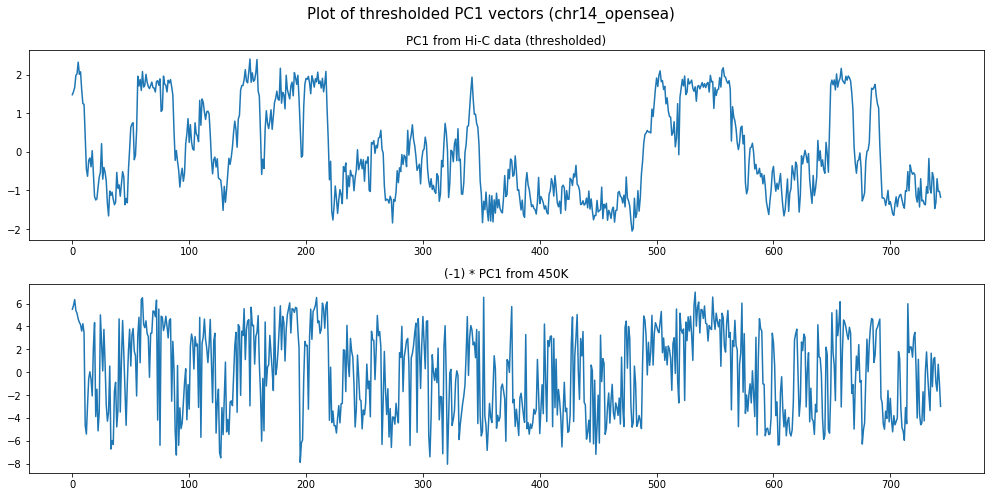

In [79]:
fig = plt.figure(figsize = (14, 7))

ax1 = fig.add_subplot(211)
ax1.plot(pca_hic_thresholded)
ax1.set_title("PC1 from Hi-C data (thresholded)")
ax2 = fig.add_subplot(212)
ax2.plot(pca_450k_v2_thresholded)

if sgn == -1:
    title = '(-1) * PC1 from 450K'
elif sgn == 1:
    title = 'PC1 from 450K'
ax2.set_title(title)

suptitle_ = 'Plot of thresholded PC1 vectors (chr'+chromosome+'_'+region+')'
plt.suptitle(suptitle_, fontsize = 15)
plt.tight_layout()
#plt.show()
plot_fname = 'Plot_thresholded_PC1_chr_'+chromosome+'_'+region+'.png'
plt.savefig(plot_fname)
print("threshold_plot_fname: ", plot_fname)
print("\n")

### Densities of corr. of the 450k methylation probes
- binned_corr_450k
- binned_corr_hic2
- ===================
- pca_hic_pc1
- pca_450k_pc1_v2
- ===================
- pca_hic_thresholded
- pca_450k_v2_thresholded

#### positive values of the eigenvector are associated with the closed compartment
- (+) --> B (closed chromatin) // (-) --> A (open chromatin)

## 부호 일치도

In [87]:
comp_450k = ["A" if np.sign(x)==-1 else "B" for x in pca_450k_pc1_v2]

In [88]:
comp_hic = ["A" if np.sign(x)==-1 else "B" for x in pca_hic_pc1]

In [94]:
print("Aggrement (ratio) between A/B compartment from 450K and Hi-C: ", end = ' ')
print(np.array([comp_450k[i]==comp_hic[i] for i in range(len(comp_hic))]).sum() / len(comp_hic))
print("\n")

Aggrement (ratio) between A/B compartment from 450K and Hi-C:  0.7627345844504021


## Density plot (open-open, open-closed, closed-closed)

In [97]:
open_open_450k = []
open_closed_450k = []
closed_closed_450k = []

open_open_hic = []
open_closed_hic = []
closed_closed_hic = []

for i in range(len(comp_450k)): #since len(comp_450k) == len(comp_hic), doesn't matter whatever you use.
    if i % (len(comp_450k) // 10) == 0:
        print("============================================================")
        print("Processing {}-th bin".format(i))
    bin_comp_450k = comp_450k[i]
    bin_comp_hic = comp_hic[i]
    for j in range(len(comp_450k)):
        if i % (len(comp_450k) // 10) == 0 and j % (len(comp_450k) // 10) == 0:
            print("\nProcessing {}-th probe bin".format(j))

        bin2_comp_450k = comp_450k[j]
        bin2_comp_hic = comp_hic[j]
        if bin_comp_450k == bin2_comp_450k:
            if bin_comp_450k == 'A': #open - open
                open_open_450k.append(binned_corr_450k.iloc[i][j])
            else: #bin_comp_450k == 'B' #closed = closed
                closed_closed_450k.append(binned_corr_450k.iloc[i][j])
        if bin_comp_450k != bin2_comp_450k: #open - closed
            open_closed_450k.append(binned_corr_450k.iloc[i][j])
        if bin_comp_hic == bin2_comp_hic:
            if bin_comp_hic == 'A': #open - open
                open_open_hic.append(binned_corr_hic2.iloc[i][j])
            else: #bin_comp_hic == 'B' #closed = closed
                closed_closed_hic.append(binned_corr_hic2.iloc[i][j])
        if bin_comp_hic != bin2_comp_hic: #open - closed
            open_closed_hic.append(binned_corr_hic2.iloc[i][j])

In [111]:
print("Number of entries from each compartment-compartment binned correlations: ")
print("\n")
print("open_open_450k: ", end = ' ')
print(len(open_open_450k))
print("open_closed_450k: ", end = ' ')
print(len(open_closed_450k))
print("closed_closed_450k: ", end = ' ')
print(len(closed_closed_450k))
print("total 450k: ", end = ' ')
print(len(binned_corr_450k.values.flatten()))

open_open_450k:  123904
open_closed_450k:  277376
closed_closed_450k:  155236
total 450k:  556516


In [112]:
print("\nopen_open_450k + open_closed_450k + closed_closed_450k - total 450k (should be 0): ", end = ' ')
print(len(open_open_450k) + len(open_closed_450k) + len(closed_closed_450k) - len(binned_corr_450k.values.flatten()))
print("\n")


open_open_450k + open_closed_450k + closed_closed_450k - total 450k (should be 0):  0


In [113]:
print("open_open_hic: ", end = ' ')
print(len(open_open_hic))
print("open_closed_hic: ", end = ' ')
print(len(open_closed_hic))
print("closed_closed_hic: ", end = ' ')
print(len(closed_closed_hic))
print("total hic: ", end = ' ')
print(len(binned_corr_hic2.values.flatten()))
print("\n")

open_open_hic:  180625
open_closed_hic:  272850
closed_closed_hic:  103041
total hic:  556516


In [114]:
print("open_open_hic + open_closed_hic + closed_closed_hic - total hic(should be 0): ", end = ' ')
print(len(open_open_hic) + len(open_closed_hic) + len(closed_closed_hic) - len(binned_corr_hic2.values.flatten()))
print("\n")


open_open_hic + open_closed_hic + closed_closed_hic - total hic(should be 0):  0


# Structure of long-range correlations in DNA methylation data ([1])

/data/project/jeewon/miniconda3/envs/jw/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/project/jeewon/miniconda3/envs/jw/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/project/jeewon/miniconda3/envs/jw/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

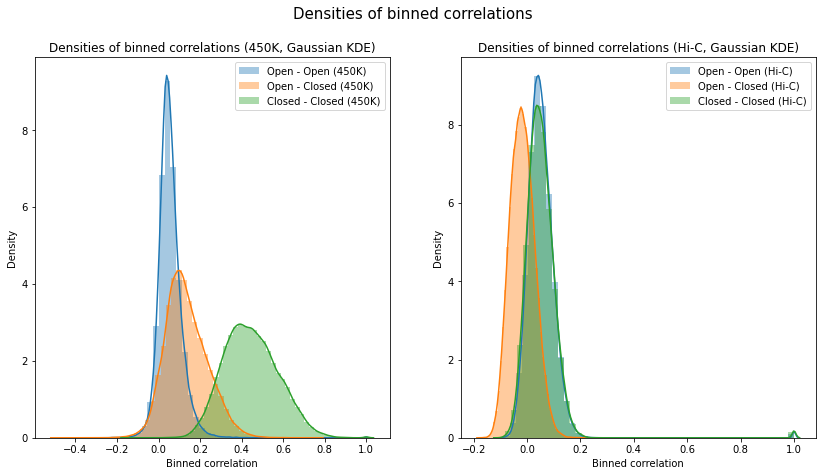

In [133]:
fig = plt.figure(figsize = (14,7))

ax1 = fig.add_subplot(121)
sns.distplot(open_open_450k, kde=True, hist=True, ax = ax1, label = 'Open - Open (450K)')
sns.distplot(open_closed_450k, kde = True, hist=True, ax = ax1, label = 'Open - Closed (450K)')
sns.distplot(closed_closed_450k, kde = True, hist=True, ax = ax1, label = 'Closed - Closed (450K)')
ax1.set_title("Densities of binned correlations (450K, Gaussian KDE)")
ax1.set_xlabel('Binned correlation')
ax1.set_ylabel('Density')
ax1.legend()

ax2 = fig.add_subplot(122)
sns.distplot(open_open_hic, kde=True, hist=True, ax = ax2, label = 'Open - Open (Hi-C)')
sns.distplot(open_closed_hic, kde = True, hist=True, ax = ax2, label = 'Open - Closed (Hi-C)')
sns.distplot(closed_closed_hic, kde = True, hist=True, ax = ax2, label = 'Closed - Closed (Hi-C)')
ax2.set_title("Densities of binned correlations (Hi-C, Gaussian KDE)")
ax2.set_xlabel('Binned correlation')
ax2.set_ylabel('Density')
ax2.legend()

plt.suptitle('Densities of binned correlations', fontsize = 15)
#plt.show()
plt.savefig('kde_binned_corr_chr'+chromosome+'_'+region+'.png')
print("\n")

## Interpretation about plots in manuscript:
##### Most of the binned corr. matrix (450K) contains corr. values around zero (slightly positive), except between two bins both in the closed compartment, which have an intermediate corr. value of 0.2 ~ 0.5. 
##### This shows why an eigen analysis of the binned corr. matrix recovers open and closed compartments (which can be visualized through heatmap plots above). 
##### The lack of decay of corr. with distance extends even to trans-chromosomal correlations (Figure S8) ([1])

===============================================================================================================

# Reference
- [1] Fortin, Jean-Philippe, and Kasper D. Hansen. "Reconstructing A/B compartments as revealed by Hi-C using long-range correlations in epigenetic data." *Genome biology* 16.1 (2015): 1-23.